In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula as smf
import datetime

vac = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis_std.csv')
idh = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
covidd = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto50/DefuncionesDEIS_confirmadosPorComuna_std.csv')

In [2]:
vacc = vac['Codigo comuna'].isin(idh['comuna'])
vacc =vac.loc[vacc == True]
vacc

,Region,Codigo region,Comuna,Codigo comuna,Fecha,Primera Dosis
88,Metropolitana,13,Alhue,13502.0,2020-12-24,0.0
89,Metropolitana,13,Buin,13402.0,2020-12-24,0.0
90,Metropolitana,13,Calera de Tango,13403.0,2020-12-24,0.0
91,Metropolitana,13,Cerrillos,13102.0,2020-12-24,0.0
92,Metropolitana,13,Cerro Navia,13103.0,2020-12-24,0.0
...,...,...,...,...,...,...
72173,Metropolitana,13,San Ramon,13131.0,2021-07-11,196.0
72174,Metropolitana,13,Santiago,13101.0,2021-07-11,0.0
72175,Metropolitana,13,Talagante,13601.0,2021-07-11,0.0
72176,Metropolitana,13,Tiltil,13303.0,2021-07-11,0.0


In [3]:
vacc.dtypes

Region            object
Codigo region      int64
Comuna            object
Codigo comuna    float64
Fecha             object
Primera Dosis    float64
dtype: object

Se cambia el tipo de dato de la columna fecha para poder operarlo en el formato fecha

In [4]:
vacc['Fecha'] = pd.to_datetime(vacc['Fecha'], dayfirst = True)

<ipython-input-4-7ba03a876c6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc['Fecha'] = pd.to_datetime(vacc['Fecha'], dayfirst = True)


In [5]:
grouper = pd.Grouper(key='Fecha', freq='W')
vacc["Semana"] = vacc.groupby(grouper).grouper.group_info[0] + 1
vacc = vacc.groupby(['Semana', 'Codigo comuna']).sum()

<ipython-input-5-8247c86fbcf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc["Semana"] = vacc.groupby(grouper).grouper.group_info[0] + 1


In [6]:
vacc

Codigo region  Primera Dosis
Semana Codigo comuna                              
1      13101.0                   52         1228.0
       13102.0                   52            0.0
       13103.0                   52            0.0
       13104.0                   52            0.0
       13105.0                   52            0.0
...                             ...            ...
29     13601.0                   91         1306.0
       13602.0                   91          450.0
       13603.0                   91          478.0
       13604.0                   91         1379.0
       13605.0                   91         1404.0

[1508 rows x 2 columns]

In [7]:
vacc.drop('Codigo region', axis = 1)

Primera Dosis
Semana Codigo comuna               
1      13101.0               1228.0
       13102.0                  0.0
       13103.0                  0.0
       13104.0                  0.0
       13105.0                  0.0
...                             ...
29     13601.0               1306.0
       13602.0                450.0
       13603.0                478.0
       13604.0               1379.0
       13605.0               1404.0

[1508 rows x 1 columns]

In [8]:
covidd['Fecha'] = pd.to_datetime(covidd['Fecha'], dayfirst = True)
covidd

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Defunciones
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-03-16,0.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-03-16,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-03-16,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-03-16,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-03-16,NaN
...,...,...,...,...,...,...,...
173393,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,2021-07-07,0.0
173394,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,2021-07-07,0.0
173395,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,2021-07-07,0.0
173396,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,2021-07-07,0.0


In [9]:
covidscl = covidd['Codigo comuna'].isin(idh['comuna'])
covidscl = covidd.loc[covidscl == True]
covidscl.reset_index().drop('index', axis=1)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Defunciones
0,Metropolitana,13,Alhue,13502.0,7405.0,2020-03-16,0.0
1,Metropolitana,13,Buin,13402.0,109641.0,2020-03-16,0.0
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,2020-03-16,0.0
3,Metropolitana,13,Cerrillos,13102.0,88956.0,2020-03-16,0.0
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,2020-03-16,0.0
...,...,...,...,...,...,...,...
24903,Metropolitana,13,San Ramon,13131.0,86510.0,2021-07-07,0.0
24904,Metropolitana,13,Santiago,13101.0,503147.0,2021-07-07,0.0
24905,Metropolitana,13,Talagante,13601.0,81838.0,2021-07-07,0.0
24906,Metropolitana,13,Tiltil,13303.0,21477.0,2021-07-07,0.0


In [14]:
covidscl1 = covidscl.drop(range(14716))

KeyError: '[    0     1     2 ... 14713 14714 14715] not found in axis'

In [15]:
covidscl['Defunciones'].sum()

17542.0

In [17]:
covidscl["Semana"] = covidscl.groupby(grouper).grouper.group_info[0] + 1

<ipython-input-17-86abde80f626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidscl["Semana"] = covidscl.groupby(grouper).grouper.group_info[0] + 1


In [21]:
covidscl = covidscl.groupby(['Semana', 'Codigo comuna']).sum('Defunciones').reset_index()

In [22]:
covidscl

,Semana,Codigo comuna,Codigo region,Poblacion,Defunciones
0,1,13101.0,91,3522029.0,0.0
1,1,13102.0,91,622692.0,1.0
2,1,13103.0,91,997255.0,1.0
3,1,13104.0,91,974365.0,0.0
4,1,13105.0,91,1204000.0,0.0
...,...,...,...,...,...
3583,69,13601.0,39,245514.0,0.0
3584,69,13602.0,39,120042.0,1.0
3585,69,13603.0,39,120513.0,1.0
3586,69,13604.0,39,222564.0,0.0


In [24]:
covidscl = covidscl.drop(['Codigo region','Poblacion'], axis = 1)

In [25]:
equis =pd.merge(vacc, covidscl, on=['Semana','Codigo comuna'], how='left')

In [26]:
equis

,Semana,Codigo comuna,Codigo region,Primera Dosis,Defunciones
0,1,13101.0,52,1228.0,0.0
1,1,13102.0,52,0.0,1.0
2,1,13103.0,52,0.0,1.0
3,1,13104.0,52,0.0,0.0
4,1,13105.0,52,0.0,0.0
...,...,...,...,...,...
1503,29,13601.0,91,1306.0,0.0
1504,29,13602.0,91,450.0,1.0
1505,29,13603.0,91,478.0,1.0
1506,29,13604.0,91,1379.0,3.0


In [29]:
idh=idh.rename(columns={'comuna':'Codigo comuna'})
idh=idh.loc[:,['Codigo comuna','HDI']]

In [30]:
igriega = pd.merge(equis, idh, on=['Codigo comuna'], how='left')

In [31]:
idh

,Codigo comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015
5,13106,0.767604
6,13107,0.712375
7,13108,0.763935
8,13109,0.850780
9,13110,0.795888


In [37]:
pob = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv")

In [38]:
pob = pob.loc[:,['Codigo comuna','Poblacion']]

In [40]:
data = pd.merge(igriega, pob, on=['Codigo comuna'], how='left')
data

,Semana,Codigo comuna,Codigo region,Primera Dosis,Defunciones,HDI,Poblacion
0,1,13101.0,52,1228.0,0.0,0.861222,503147.0
1,1,13102.0,52,0.0,1.0,0.764616,88956.0
2,1,13103.0,52,0.0,1.0,0.718874,142465.0
3,1,13104.0,52,0.0,0.0,0.749584,139195.0
4,1,13105.0,52,0.0,0.0,0.742015,172000.0
...,...,...,...,...,...,...,...
1503,29,13601.0,91,1306.0,0.0,0.759548,81838.0
1504,29,13602.0,91,450.0,1.0,0.728127,40014.0
1505,29,13603.0,91,478.0,1.0,0.776123,40171.0
1506,29,13604.0,91,1379.0,3.0,0.719437,74188.0


In [49]:
data['def*100mil'] = (data['Defunciones']*100000)/data['Poblacion']

SyntaxError: unmatched ')' (<ipython-input-49-c20cc37e4782>, line 1)

In [47]:
dataA = data.groupby(['Codigo comuna','HDI','Poblacion']).sum().reset_index()
dataA

,Codigo comuna,HDI,Poblacion,Semana,Codigo region,Primera Dosis,Defunciones,def*100mil
0,13101.0,0.861222,503147.0,435,2600,289664.0,287.0,57.040984
1,13102.0,0.764616,88956.0,435,2600,50012.0,80.0,89.932101
2,13103.0,0.718874,142465.0,435,2600,74917.0,300.0,210.578037
3,13104.0,0.749584,139195.0,435,2600,99163.0,240.0,172.419986
4,13105.0,0.742015,172000.0,435,2600,101296.0,236.0,137.209302
5,13106.0,0.767604,206792.0,435,2600,97504.0,146.0,70.602344
6,13107.0,0.712375,112528.0,435,2600,82033.0,165.0,146.630172
7,13108.0,0.763935,142065.0,435,2600,93925.0,286.0,201.316299
8,13109.0,0.850780,100434.0,435,2600,60910.0,146.0,145.369098
9,13110.0,0.795888,402433.0,435,2600,283353.0,497.0,123.498818


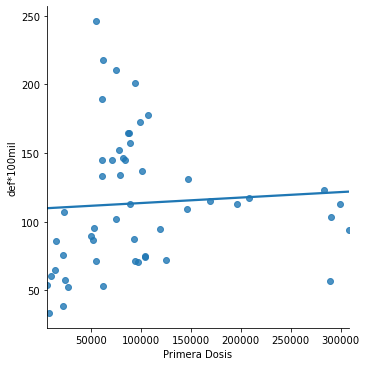

In [48]:
import seaborn as sb

sb.lmplot(x = "Primera Dosis",
            y = "def*100mil", 
            ci = None,
            data = dataA)

In [53]:
import statsmodels.formula.api as smff
dataA = dataA.rename(columns={'Primera Dosis':'Primera_Dosis'})
modelo = smff.ols(formula='Defunciones ~ Primera_Dosis + HDI',data= dataA)

In [55]:
results = modelo.fit()

In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Defunciones   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     93.23
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.99e-17
Time:                        23:25:08   Log-Likelihood:                -292.42
No. Observations:                  52   AIC:                             590.8
Df Residuals:                      49   BIC:                             596.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       568.9315    107.780      5.279

Según el R^2 del modelo el número de vacunados y el IDH tienen una correlación del 79,2% .
Según el R^2 ajustado, un 78,3% de la variación de las muertes son explicadas por el modelo.

Las notas indican que existe una gran multicolinealidad en el modelo, se intuye que es debido a que las vacunas están fuertemente relacionadas al IDH de las comunas.